<a href="https://colab.research.google.com/github/JoshuaPaul-lasisi/Customer_segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview: Customer Segmentation

**Introduction:**

This project aims to leverage customer data to identify meaningful segments within our customer base. By analyzing various aspects of the data, we will uncover patterns, trends, and relationships that can inform targeted marketing strategies and improve customer engagement.

**Project Background:**

The data used in this analysis comes from [brief description of dataset source and contents]. This dataset includes [list key features and variables relevant to customer segmentation].

**Objective:**

The primary objective of this project is to gain a deeper understanding of our customer base and identify distinct groups based on shared characteristics and behaviors. This will allow us to:

* **Develop targeted marketing campaigns:** Tailor messaging and offerings to specific customer segments for increased effectiveness.
* **Improve customer retention:** Identify at-risk segments and implement strategies to foster loyalty and prevent churn.
* **Optimize resource allocation:** Focus efforts on the most valuable customer segments to maximize return on investment.

**Methodology:**

This project will utilize a data-driven approach to customer segmentation. We will employ various exploratory data analysis techniques, including:

* **Univariate analysis:** Examining the distribution and characteristics of individual variables.
* **Bivariate analysis:** Exploring relationships between pairs of variables.
* **Categorical variable analysis:** Understanding the impact of categorical variables on customer behavior.
* **Time series analysis:** Analyzing customer behavior over time, including purchase patterns and trends.
* **Outlier detection:** Identifying and handling potential data anomalies.

**Expected Output:**

By the end of this project, we aim to achieve the following:

* **Identify distinct customer segments:** Define clear and actionable segments based on shared characteristics and behaviors.
* **Develop segment profiles:** Create detailed descriptions of each segment, including key attributes, purchase patterns, and potential needs.
* **Formulate targeted marketing strategies:** Recommend specific marketing approaches and messaging tailored to each segment.

**Next Steps:**

Following this exploratory analysis, we will proceed with the following:

* **Segmentation model development:** Implement and evaluate various segmentation models to identify the most effective approach.
* **Model validation and refinement:** Assess the performance of the chosen model and refine it as needed.
* **Actionable insights and recommendations:** Translate the segmentation findings into actionable strategies for marketing, customer engagement, and product development.

This project will provide valuable insights into our customer base and empower us to make data-driven decisions that improve customer relationships and drive business growth.

**Additional Considerations:**

* **Customer Lifetime Value (CLTV):** Consider incorporating CLTV analysis to understand the long-term value of each customer segment.
* **RFM Analysis:** RFM (Recency, Frequency, Monetary) analysis can provide valuable insights into customer engagement and purchase behavior.
* **Customer Journey Mapping:** Understanding the customer journey across different touchpoints can inform targeted marketing strategies.
* **Ethical Considerations:** Ensure data privacy and ethical considerations are addressed throughout the project.


Necessary imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


...and the dataframe to be used


In [5]:
# Second Dataframe used in the kaggle we went through in our meeting
df = pd.read_csv('https://raw.githubusercontent.com/sheidheda/SusAc-ML-Files/main/cs_data2.csv', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Loading & Cleaning

This section of the notebook focuses on preparing the dataset for analysis by loading it into the environment and performing initial data cleaning steps. These steps are crucial to ensure that the data is in a usable format and free from any inconsistencies that could affect the analysis results. This section will address any missing values, outliers, and duplicates in the dataset, ensuring that the data is clean and ready for further analysis.

______________________________________
### Peeking under the hood of the data



We get a quick glance of the data. Why?

To check:
- How big the data is
- the kind of data in each column
- to check for possible missing values
- to check how much space our data takes

In [6]:
#checking the info for df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


We now have answers to our questions:
- **Data size** -> 541,909 entries
- **Kind of data** -> the dataset contains a mix of data types
- **Possible missing values** -> Description and CustomerID have non-null counts less than the total number of entries. This indicates that there might be missing values in these columns
- **Space data takes** -> Memory usage is approximately 33.1+ MB


A more concise depiction of our dataset inspecting the dimensions of our dataset shows our dataset is **large** with 541,909 columns and 8 columns as seen below


In [7]:
df.shape

(541909, 8)

The **CustomerID** column should not be a float but a string since it is an identifier that could have leading zeros especially for older customers.

We will therefore convert it to string and remove the decimal point

In [8]:
df['CustomerID'] = df['CustomerID'].astype(str).str[:-2]

The **Quantity** ordered should not be less than zero for it to get into an invoice. But just in case, we will check it...

In [9]:
# to check whether quantity column has negative values
if (df['Quantity'].unique() <0).any():

  print("there is presence of Negative values")

there is presence of Negative values


This shows that we have **refunds** in our dataset. We will consider this is in our **segmentation**.

## Sorting out duplicates

The next step is to consider if we have any duplicates in the data.

For large data like this, we will employ the **.duplicate()** function which shows columns with repeated values for all columns.

In [10]:
# Identify rows with duplicate values across all columns in df2
duplicates = df[df.duplicated()]

# Count the number of duplicate rows
number_of_duplicates = len(duplicates)

# Print a message to inform the user about the results
print(f"The DataFrame df has {number_of_duplicates} duplicate rows.")

The DataFrame df has 5268 duplicate rows.


...to view them

In [11]:
duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446,United Kingdom


Considering that they are redundancies, we will remove them **completely** from the dataframe.

In [12]:
# Drop the duplicates
df.drop_duplicates(inplace = True)

Our next course of action is to confirm if we have any missing values in our dataset.

To specify which columns have missing values...

##  Correcting missing values

In [13]:
# Check for missing values in df2
missing_values = df.isnull().sum()

# Calculate missing value percentages as a ratio (avoiding data type issues)
missing_percentages = (missing_values / len(df)) * 100

# Print a summary of missing values for each column
for col in df.columns:
  # Check if there are any missing values (avoiding unnecessary comparisons)
  if missing_values[col] > 0:
    print(f"Column '{col}' has {missing_values[col]} missing values ({missing_percentages[col]:.2f}%)")

Column 'Description' has 1454 missing values (0.27%)


We find that the **Description** and **CustomerID** columns have 1454 and 135037 missing values respectively.

Since CustomerID identifies the customer and Description identifies the product, let's see if there are cases where both product and customer are not identified

In [14]:
# columns with both description and CustomerID as null
no_id_desc = df[(df['Description'].isnull()) & (df['CustomerID'].isnull())]
no_id_desc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We are **positive** that there are such columns and we also notice that they are the **exact same amount** as the amount of missing values in the Description column.

We can conclude that this is a subset of the rows with missing customer identifiers.

Another **observation** is that some of our unit prices are **zero**. Let's check how many...

In [15]:
no_id_desc['UnitPrice'].unique()

array([], dtype=float64)

**All of them!!!!**
Since there is not unit price, it means there is no sale.

When there is no sale, there is no customer.

This part of the data therefore adds no value to our **customer segmentation** then.

We will continue without them.

In [16]:
df_null = df[-df['Description'].isnull()]

Now we check how many null values we have left in the dataset

In [17]:
df_null.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df_null['CustomerID'].fillna('Null', inplace = True)

df_null.isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_19276\2079389659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_null['CustomerID'].fillna('Null', inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19276\2079389659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['CustomerID'].fillna('Null', inplace = True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## The finished work

In [19]:
df_cleaned = df_null

df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


# Univariate Analysis

## Customer Location Distribution

To analyze the distribution of countries where invoices originate.
- Are there dominant regions?
- Are there any under-represented areas with potential growth opportunities?

In [20]:
# Taking stock of the countries
country_counts = df['Country'].value_counts()

# Print the distribution of countries (number of invoices from each country)
print(country_counts)

Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


To visualize this on one bar chart would be unreasonable. We will therefore group them into three secluding the result of United Kingdom considering it is overwhelmingly higher than others.

Firstly, we define a function

In [21]:
def plot_series_subset(data_series, lower_limit, upper_limit):
  """
  This function creates a bar chart for a subset of a pandas Series based on upper and lower limits.

  Args:
      data_series (pandas.Series): The pandas Series containing the data.
      lower_limit (int/float): The lower limit for the subset (inclusive).
      upper_limit (int/float): The upper limit for the subset (exclusive).
      title (str, optional): The title for the chart. Defaults to "Series Distribution".
      xlabel (str, optional): The label for the x-axis. Defaults to "Index".
      ylabel (str, optional): The label for the y-axis. Defaults to "Values".
      color (str, optional): The color for the bars in the chart. Defaults to 'skyblue'.
  """

  # Subset the data series based on limits
  subset_data = data_series[(data_series >= lower_limit) & (data_series < upper_limit)]

  # Create the chart with error handling (in case subset is empty)
  if not subset_data.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(subset_data.index, subset_data.values, color='orange')
    plt.title("Distribution of Invoices by Countries", fontsize=16)
    plt.xlabel(f"Countries with invoices from {lower_limit} to {upper_limit}", fontsize=14)
    plt.ylabel('Number of Invoices', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
  else:
    print("No data points within the specified limits. Please adjust the limits or check the data series.")


**1. Groups below 100**

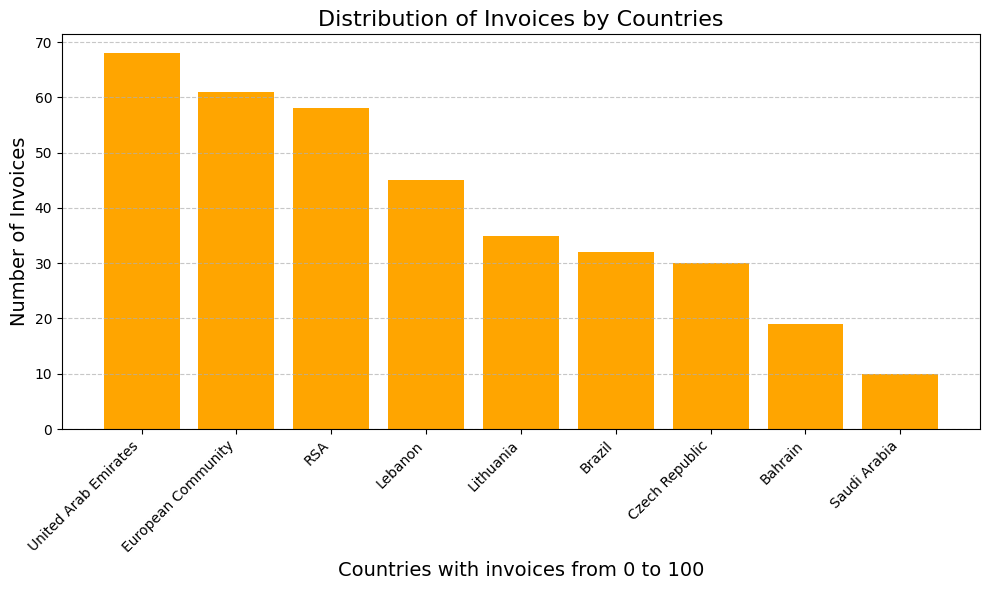

In [22]:
# For countries with invoices from zero to 100
plot_series_subset(country_counts, lower_limit=0, upper_limit=100)

**1. Groups between 100 and 1000 invoices**

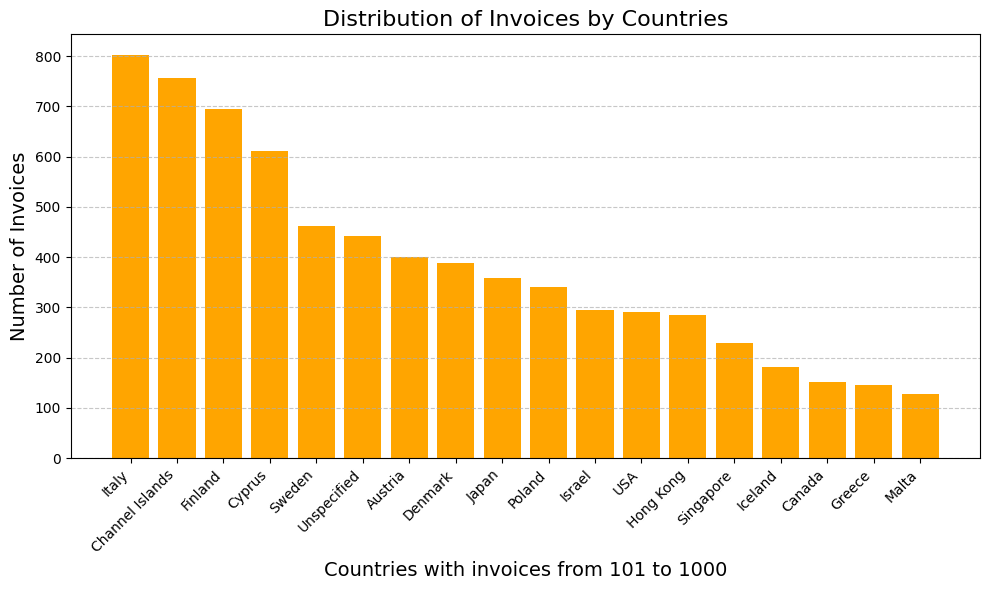

In [23]:
# For countries with invoices from 101 to 1000
plot_series_subset(country_counts, lower_limit=101, upper_limit=1000)

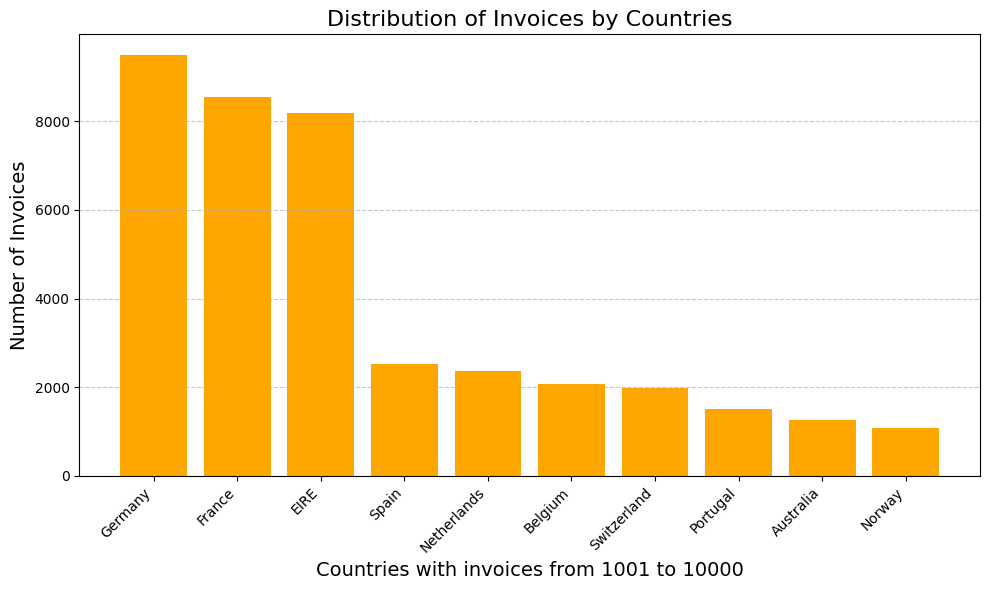

In [24]:
# For countries with invoices from 1001 to 10000
plot_series_subset(country_counts, lower_limit=1001, upper_limit=10000)

The customer location distribution shows:

1. **UK Dominance**: The United Kingdom stands out with a significantly higher number of invoices (almost 500,000) compared to other countries. This suggests a strong UK customer base that might require focused attention and potentially tailored marketing strategies.

2. **European Focus**: The majority of invoices originate from European countries, indicating a strong European customer base. This could be further segmented by region within Europe (e.g., Western Europe, Eastern Europe) for more granular analysis.

3. **Long Tail**: Beyond the UK, there's a long tail of countries with much lower invoice counts. These might represent smaller customer segments that could be grouped together based on geographic proximity, cultural similarities, or other relevant factors.

4. **Unspecified**: The "Unspecified" category requires further investigation. It's crucial to understand why these invoices lack a specific country and determine if they can be categorized based on additional data or cleaning efforts.

## Distribution of Purchases

For **Quantity Purchased**

In [40]:
df.groupby('Quantity')['InvoiceNo'].count().sort_values(ascending = False)

Quantity
 1        144495
 2         81245
 12        60858
 6         40656
 4         38393
           ...  
-235           1
-242           1
-244           1
-251           1
 80995         1
Name: InvoiceNo, Length: 722, dtype: int64

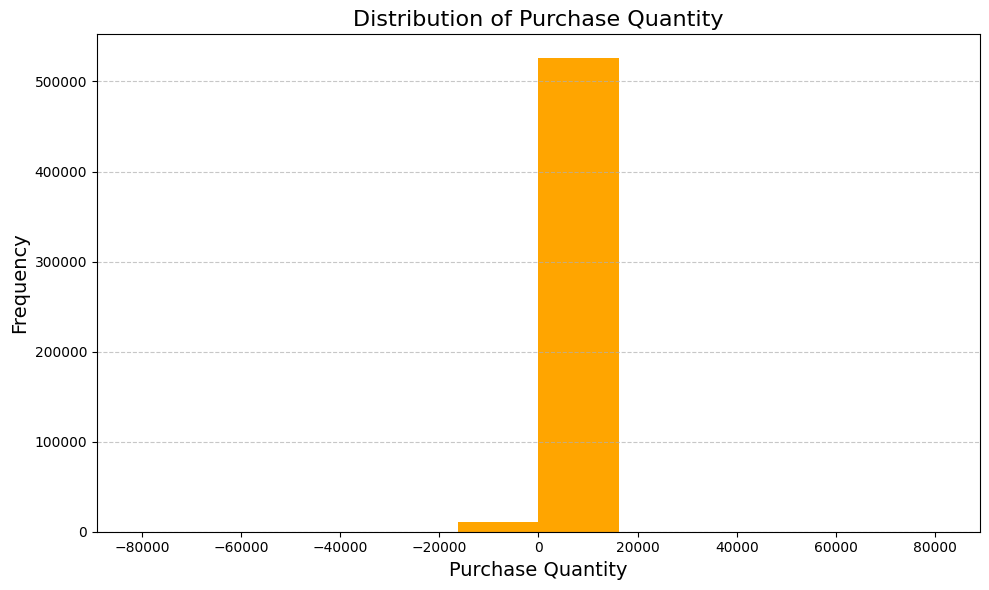

In [34]:
# histogram of quantity purchased
plt.figure(figsize=(10,6))
plt.hist(df['Quantity'], color = 'orange')
plt.xlabel('Purchase Quantity', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Distribution of Purchase Quantity', fontsize = 16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
def get_purchase_frequency(group):
    # Assuming invoices are sorted by date (might need to sort if not)
    time_diffs = group['InvoiceDate'].diff()
    # Exclude the first difference (no prior invoice for the first entry)
    time_diffs = time_diffs[1:]
    # Extract the days from the time differences
    time_diffs = time_diffs.dt.days
    # Group by the extracted days
    grouped_time_diffs = time_diffs.groupby(time_diffs)
    # Calculate the count of invoices for each day group
    customer_counts = grouped_time_diffs.size()
    # Return the customer counts for each day group
    return customer_counts


## Average Order Value

In [27]:
# Calculate total invoice value (quantity * unit price)
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

# Calculate average order value
avg_order_value = df['TotalValue'].mean()

# Print or analyze the average order value
print(f"Average Order Value: {avg_order_value:.2f}")


Average Order Value: 18.12


# Bivariate Analysis

# Time-series Analysis

# Feature Engineering

# Model Development

# Model Validation and Refinement

# Conclusion